In [1]:
import sys, os, glob
import pandas as pd
import numpy as np
import pickle

from matplotlib import ticker, cm, colors
from matplotlib.lines import Line2D
import matplotlib
import matplotlib.pyplot as plt

from scipy.interpolate import griddata as scipyGrid

In [2]:
# import plotting utils
sys.path.append( "/data/user/tvaneede/utils" )

from FlavourScansPlotting import get_contour_points, plot_confidence_intervals

# load and set matplotlib parameters
%matplotlib inline

In [3]:
from NNMFit.utilities import ScanHandler

In [4]:
import matplotlib as mpl

rcParams = {
            "axes.titlesize": 16,
            "axes.labelsize": 14,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            }

mpl.rcParams.update(rcParams)

In [5]:
scan_dir_dict = {
                 "asimov" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output/asimov_Poisson_TrackBestFit/flavor",
                 "say" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output/asimov_SAYLLH_TrackBestFit/flavor",
                 "say_largerRange" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output/asimov_SAYLLH_TrackBestFit_largerRange/flavor",
                 "say_customRange" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output/asimov_SAYLLH_TrackBestFit_customRange/flavor",
                 "say_nosyst" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output/asimov_SAYLLH_TrackBestFit_nosyst/flavor",

                "all_v1" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_global_hese/asimov_Poisson_incl_HESE_v1/flavor/",
                "all_v2" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_global_hese/asimov_Poisson_incl_HESE_v2/flavor/",
                "all_v3.0" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_global_hese/asimov_Poisson_incl_HESE_v3.0/flavor/",
                "all_v3.1" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_global_hese/asimov_Poisson_incl_HESE_v3.1/flavor/",
                "all_v3.2" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_global_hese/asimov_Poisson_incl_HESE_v3.2/flavor/",
                "all_v3.3" : "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output_global_hese/asimov_Poisson_incl_HESE_v3.3/flavor/",

                 }

In [6]:
drop_unsuccessful = True

scan_dict = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)

asimov
say
say_largerRange
say_customRange
say_nosyst
all_v1
all_v2
all_v3.0
all_v3.1
all_v3.2
all_v3.3


Index(['CR_grad', 'astro_norm', 'astro_nue_ratio', 'astro_nutau_ratio',
       'barr_h', 'barr_w', 'barr_y', 'barr_z', 'conv_norm', 'delta_gamma',
       'dom_eff', 'effective_veto', 'fit_success', 'gamma_astro', 'ice_abs',
       'ice_holep0', 'ice_holep1', 'ice_scat', 'inel_scale', 'llh',
       'muon_norm', 'muongun_norm', 'prompt_norm'],
      dtype='object')


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  7.,
         6.,  6.,  6.,  4.,  3.,  5.,  7.,  8.,  3.,  7.,  6.,  9., 15.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.]),
 array([-0.49975989, -0.47486473, -0.44996957, -0.42507441, -0.40017925,
        -0.3752841 , -0.35038894, -0.32549378, -0.30059862, -0.27570346,
        -0.2508083 , -0.22591315, -0.20101799, -0.17612283, -0.15122767,
        -0.12633251, -0.10143736, -0.0765422 , -0.05164704, -0.02675188,
        -0.00185672,  0.02303844,  0.04793359,  0.07282875,  0.09772391,
         0.12261907,  0.14751423,  0.17240939,  0.19730454,  0.2221997 ,
         0.24709486,  0.27199002,  0.29688518,  0.32178033,  0.34667549,
         0.37157065,  0.39646581,  0.42136097,  0.44625613,  0.47115128,
         0.49604644]),
 <BarContainer object of 40 artists>)

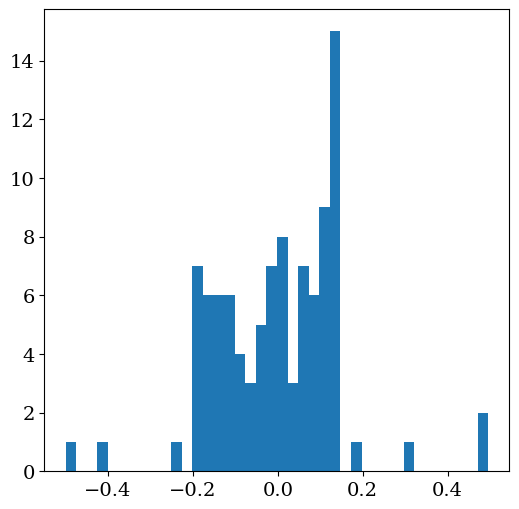

In [ ]:
# print(scan_dict["all_v2"].get_raw_df().keys())
# plt.hist( scan_dict["all_v2"].get_raw_df()["llh"], bins = np.linspace(0,100,20) )
# plt.hist( scan_dict["all_v2"].get_raw_df()["muongun_norm"], bins = 20 )
# plt.hist( scan_dict["all_v2"].get_raw_df()["muon_norm"], bins = 20 )
# plt.hist( scan_dict["all_v2"].get_raw_df()["barr_w"], bins = 40 )

In [7]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

In [8]:
from flavor_fracs import *
points = pd.read_pickle(
'/data/user/tvaneede/GlobalFit/custom_scan_flavor/default_custom_scan_points_flavor.pickle'
)
flavs = flavor_frac(np.asarray(points['astro_nue_ratio']),np.asarray(points['astro_nutau_ratio']))

In [9]:
from Ternary import flavor_triangle
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})
levels = [2.37,5.99]#,4.605]#4.605#, 5.99]
levlabels = ['68%','95%']#'90% CL']#,'95% CL']
percent_levels=[68,95]#,95]

In [20]:
name = 'all_v3.2' # all_v1 say_customRange say_nosyst
 
ftau_asimov_poisson,fe_asimov_poisson,ft_grid_asimov_poisson,fe_grid_asimov_poisson,ts_grid_asimov_poisson = get_contour_points(scan_dict,name)

fmu_grid_asimov_poisson = 1 - ft_grid_asimov_poisson - fe_grid_asimov_poisson

removed stuff


/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/tmp/ipykernel_5101/1866966800.py:26: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  test = tax.ca.scatter([0], [0], marker='+', facecolor='white',


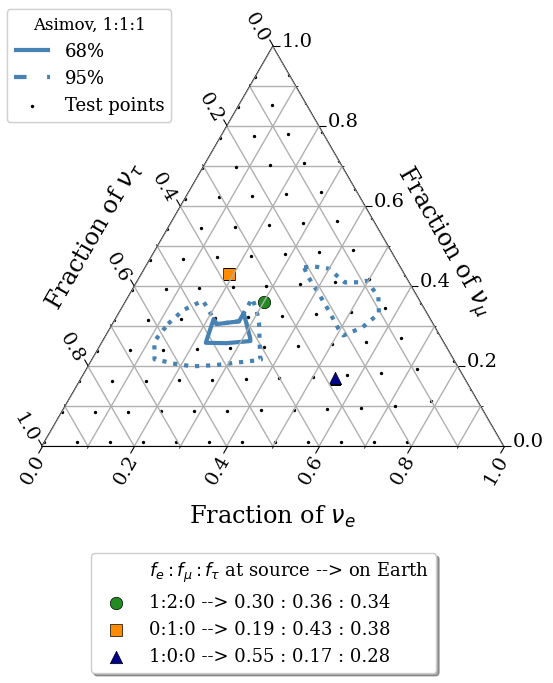

In [21]:
fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []

C2 = tax.ca.contour(ft_grid_asimov_poisson,
                    fe_grid_asimov_poisson,
                    ts_grid_asimov_poisson, 
                    levels,
                    linestyles=["-",":"],
                    linewidths=3,
                    colors='steelblue')

# set the legend
h, _ = C2.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

# which points were used in the study
test_points = tax.ca.scatter(flavs[2],flavs[0],marker="o",s=2,color="black")

lh.append(test_points)
ll.append(r'Test points')

test = tax.ca.scatter([0], [0], marker='+', facecolor='white',
                  edgecolor='w', lw=0.5, s=10)

lh.append(test)
ll.append(r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth')

# standard 1:2:0 scenario
traditional = tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
                  edgecolor='k', lw=0.5, s=80)

lh.append(traditional)
ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

# muon damped
muondamped = tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
              edgecolor='k', lw=0.5, s=80)

lh.append(muondamped)
ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')


# only electron
electron = tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
              edgecolor='k', lw=0.5, s=80)

lh.append(electron)
ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

# plt.title('Sensitivity at bestfit point - Poisson \n',y=1.1,fontdict=font_title)

l1 = tax.legend(lh[:3], ll[:3], 
                bbox_to_anchor=(0.3, 1.1),
                title="Asimov, 1:1:1",
                prop=font_legend,title_fontsize=12.)
l3 = fig.legend(lh[3:],ll[3:],
                bbox_to_anchor=(0.8, 0.05),prop=font_legend,
                ncols=1,frameon=True,fancybox=True,shadow=True)
tax.add_artist(l1)


plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/plots/output/contour_{name}.pdf",bbox_inches='tight')

/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)


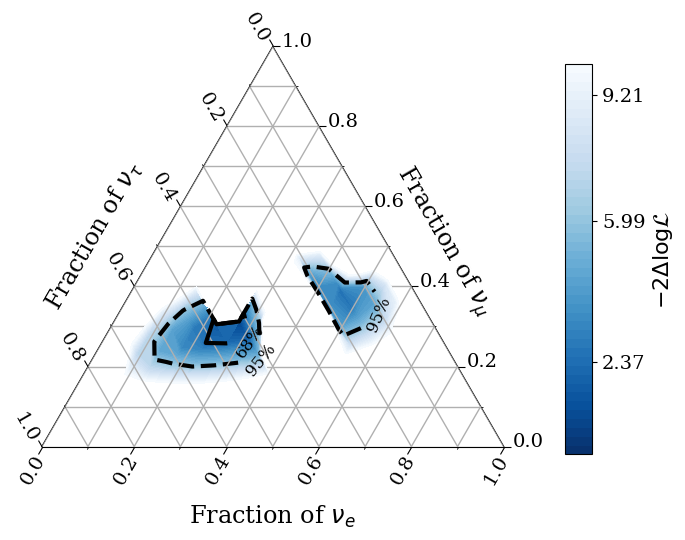

In [22]:
fig = plt.figure()
tax = flavor_triangle()

lh, ll = [], []

C2 = tax.ca.contour(ft_grid_asimov_poisson,
                    fe_grid_asimov_poisson,
                    ts_grid_asimov_poisson, 
                    levels,
                    linestyles=["-",'--'],
                    linewidths=3,
                    colors='black')


levs_vals = np.linspace(0,10,num=45)

# heatmap
X = tax.ca.contourf(ft_grid_asimov_poisson,
                    fe_grid_asimov_poisson,
                    ts_grid_asimov_poisson,
                    levs_vals,
                    cmap= plt.colormaps['Blues_r'])

# create colourbar
cax = plt.axes([1., 0.2, 0.045, 0.65])
cbar = plt.colorbar(X,
                    cax=cax, # axes where to make the colourbar
                    spacing='proportional',
                    ticks=[2.37,5.99,9.21])
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')
cbar.ax.set_yticklabels(['2.37','5.99','9.21'])  # vertically oriented colorbar

# set labels to the contours
fmt={}
for l, s in zip(C2.levels, levlabels):
    fmt[l] = s
plt.clabel(C2,levels,inline=True,fontsize=12.,
           fmt=fmt,colors='black')


plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/plots/output/ll_contour_{name}.pdf",bbox_inches='tight')

/tmp/ipykernel_33419/195793220.py:13: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pcm1, ax=ax1,label=r"-2 log L")
/tmp/ipykernel_33419/195793220.py:13: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pcm1, ax=ax1,label=r"-2 log L")
/tmp/ipykernel_33419/195793220.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(pcm2, ax=ax2,label=r"-2 log L")
/tmp/ipykernel_33419/195793220.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the fu

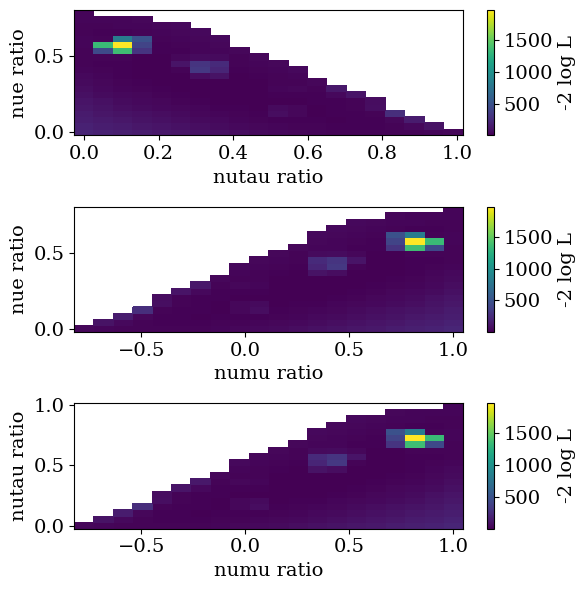

In [25]:
# plot 2D
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

# plot 1
pcm1 = ax1.pcolor(ft_grid_asimov_poisson, 
                  fe_grid_asimov_poisson, 
                  ts_grid_asimov_poisson,
                  cmap='viridis', shading='auto')

fig.colorbar(pcm1, ax=ax1,label=r"-2 log L")

ax1.set_xlabel("nutau ratio")
ax1.set_ylabel("nue ratio")

# plot 2
pcm2 = ax2.pcolor(fmu_grid_asimov_poisson, 
                  fe_grid_asimov_poisson, 
                  ts_grid_asimov_poisson,
                  cmap='viridis', shading='auto')

fig.colorbar(pcm2, ax=ax2,label=r"-2 log L")

ax2.set_xlabel("numu ratio")
ax2.set_ylabel("nue ratio")

# plot 3
pcm3 = ax3.pcolor(fmu_grid_asimov_poisson, 
                  ft_grid_asimov_poisson, 
                  ts_grid_asimov_poisson,
                  cmap='viridis', shading='auto')

fig.colorbar(pcm3, ax=ax3,label=r"-2 log L")

ax3.set_xlabel("numu ratio")
ax3.set_ylabel("nutau ratio")

fig.tight_layout()



/data/user/tvaneede/utils/Ternary.py:74: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(*args, **kwargs)
/tmp/ipykernel_33419/1038421616.py:11: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  test = tax.ca.scatter([0], [0], marker='+', facecolor='white',


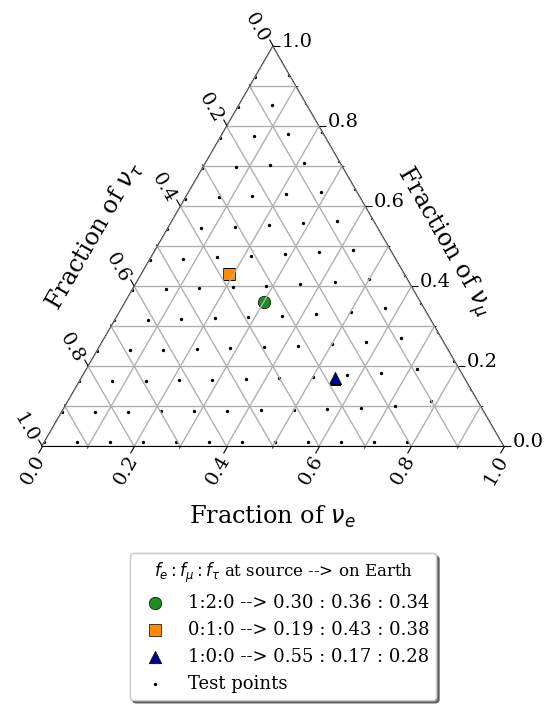

In [60]:
# scan points

fig = plt.figure(figsize=(6, 6))
tax = flavor_triangle()

lh, ll = [], []

# which points were used in the study
test_points = tax.ca.scatter(flavs[2],flavs[0],marker="o",s=2,color="black")

test = tax.ca.scatter([0], [0], marker='+', facecolor='white',
                  edgecolor='w', lw=0.5, s=10)

# standard 1:2:0 scenario
traditional = tax.ca.scatter([0.34], [0.30], marker='o', facecolor='forestgreen',
                  edgecolor='k', lw=0.5, s=80)

lh.append(traditional)
ll.append('1:2:0 --> 0.30 : 0.36 : 0.34')

# muon damped
muondamped = tax.ca.scatter([0.38], [0.19], marker='s', facecolor='darkorange',
              edgecolor='k', lw=0.5, s=80)

lh.append(muondamped)
ll.append('0:1:0 --> 0.19 : 0.43 : 0.38')


# only electron
electron = tax.ca.scatter([0.28], [0.55], marker='^', facecolor='darkblue',
              edgecolor='k', lw=0.5, s=80)

lh.append(electron)
ll.append('1:0:0 --> 0.55 : 0.17 : 0.28')

lh.append(test_points)
ll.append(r'Test points')

l1 = fig.legend(lh,ll,
        bbox_to_anchor=(.8, 0.05),prop=font_legend,title_fontsize=12,
        title=r'$f_{e}:f_{\mu}:f_{\tau}$ at source --> on Earth',
        ncols=1,frameon=True,fancybox=True,shadow=True)
tax.add_artist(l1)


plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/plots/output/scan_points.pdf",bbox_inches='tight')